In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('./Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [5]:
np.shape(df)

(506, 15)

In [6]:
df.isnull().values.any()

False

In [7]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['medv'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(X_test)

In [20]:
y_pred.shape

(102,)

In [21]:
y_test.shape

(102,)

In [12]:
model.intercept_

36.21465739487732

In [13]:
model.coef_

array([-2.82504678e-03, -8.16581337e-02,  4.96949468e-02, -6.72665411e-03,
        3.09211466e+00, -1.59669014e+01,  3.72188956e+00, -1.12541438e-02,
       -1.54286796e+00,  3.05339666e-01, -1.11724919e-02, -9.17928952e-01,
        9.67535571e-03, -4.86988612e-01])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


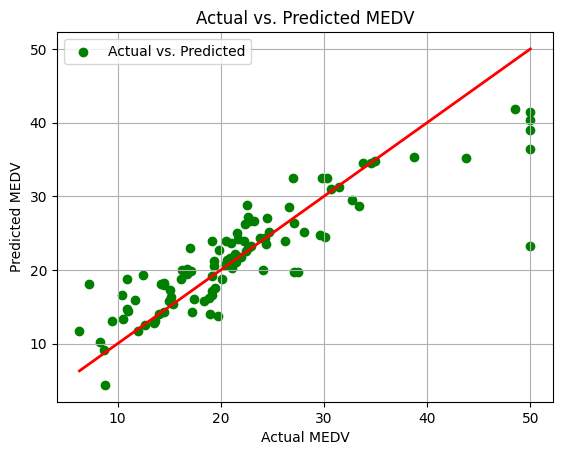

In [15]:
plt.scatter(y_test, y_pred, color='green', label='Actual vs. Predicted')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')
plt.legend()
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error,r2_score


In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")

Mean Squared Error: 23.60
R-squared (Accuracy): 75.57
